In [1]:
# Compare Algorithms
import yellowcab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
# load dataset
trip_data = yellowcab.io.read_all_files('parquet')

In [3]:
# this cell can be removed after the associated issue is fixed
trip_data = trip_data[trip_data["trip_distance"] > 0]

In [4]:
trip_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'duration', 'start_month', 'start_day',
       'start_hour', 'start_week', 'end_month', 'end_day', 'end_hour',
       'end_week', 'weekend', 'weekday', 'start_location_long',
       'start_location_lat', 'end_location_long', 'end_location_lat',
       'PUBorough', 'PUZone', 'PUservice_zone', 'DOBorough', 'DOZone',
       'DOservice_zone'],
      dtype='object')

In [5]:
known = ['passenger_count', 'trip_distance', 'PULocationID',
         'start_month', 'start_day', 'start_hour', 'start_week', 'weekend', 'weekday',
         'start_location_long', 'start_location_lat', 
         'PUBorough', 'PUservice_zone']

numerical_features = ['passenger_count', 'start_month', 'start_day', 
                      'start_hour', 'start_week', 
                      'start_location_long', 'start_location_lat']

categorical_features = ['PULocationID', 'PUBorough', 'PUservice_zone',
                        'weekend', 'weekday']

predict = ["trip_distance"]

## Comparing different ML models

In [6]:
# yellowcab.model.compare_regression(trip_data, known, predict, sample=10000,
#                                   cat_feat=['DOLocationID', 'PULocationID', 'PUBorough', 'PUservice_zone'])

## Tuning hyperparameters

In [7]:
data = trip_data.sample(200000, random_state=42)

In [8]:
X = data[known].drop(columns=predict)
y = data[predict]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [10]:
y_scaler = Pipeline([("log", FunctionTransformer(np.log1p, inverse_func=np.expm1, 
                             validate=True, check_inverse=True)),
                     ("scaler", StandardScaler().fit(y_train))
                    ])

In [11]:
y_train_log = y_scaler.transform(y_train)
y_test_log = y_scaler.transform(y_test)

<AxesSubplot:ylabel='Count'>

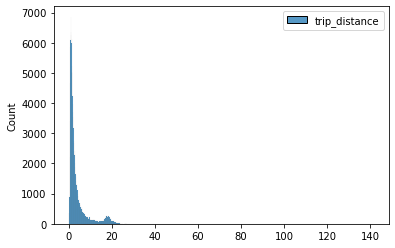

In [12]:
sns.histplot(y_train)

<AxesSubplot:ylabel='Count'>

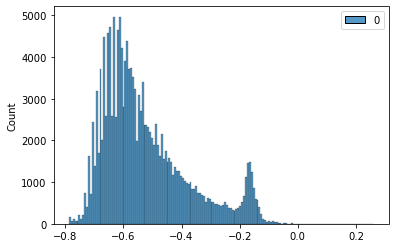

In [13]:
sns.histplot(y_train_log)

### Decision tree regressor

In [ ]:
decision_tree = yellowcab.model.training_pipe(numerical_features, categorical_features, degree=1, regressor=DecisionTreeRegressor(max_depth=100))

In [ ]:
decision_tree = decision_tree.fit(X_train, y_train)

In [ ]:
tree_result = yellowcab.model.test_regression_model(decision_tree, X_train, X_test, y_train, y_test)

In [ ]:
tree_result

### Random forest Regressor

In [ ]:
random_forest = yellowcab.model.training_pipe(numerical_features, categorical_features, degree=1, regressor=RandomForestRegressor(max_depth=100))

In [ ]:
random_forest = random_forest.fit(X_train, y_train)

In [ ]:
forest_result = yellowcab.model.test_regression_model(random_forest, X_train, X_test, y_train, y_test)

In [ ]:
forest_result

### Multi-layer perceptron regressor

In [ ]:
mlp = yellowcab.model.training_pipe(numerical_features, categorical_features, degree=1, regressor=MLPRegressor())

In [ ]:
mlp = mlp.fit(X_train, y_train)

In [ ]:
mlp_result = yellowcab.model.test_regression_model(mlp, X_train, X_test, y_train, y_test)

In [ ]:
mlp_result

### Gridsearch for polynomial features

In [14]:
lasso_grid = yellowcab.model.gridsearch('r2', numerical_features, categorical_features, regressor=Lasso())

In [15]:
lasso_grid_df = yellowcab.model.evaluate_grid(lasso_grid, X_train, y_train, "s1_gridsearch_lasso")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


{'preprocessor__num__poly__degree': 4, 'regressor__alpha': 0.0}


C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862079.4640105676, tolerance: 357.1338781576734
  model = cd_fast.enet_coordinate_descent(


In [16]:
lasso_grid_df

,preprocessor__num__poly__degree,regressor__alpha,loss
0,1,0.0000,0.511863
1,1,0.0025,0.507220
2,1,0.0050,0.503940
3,1,0.0075,0.501517
4,1,0.0100,0.500001
5,2,0.0000,0.512344
6,2,0.0025,0.507529
7,2,0.0050,0.504091
8,2,0.0075,0.501617
9,2,0.0100,0.500025


In [17]:
lasso_result = yellowcab.model.test_regression_model(lasso_grid, X_train, X_test, y_train, y_test)

In [18]:
lasso_result

,Training set,Test set
RSME,3.282681,3.278528
MAE,2.024012,2.020861


In [19]:
ridge_grid = yellowcab.model.gridsearch('r2', numerical_features, categorical_features, regressor=Ridge())

In [20]:
ridge_grid_df = yellowcab.model.evaluate_grid(ridge_grid, X_train, y_train, "s1_gridsearch_ridge")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'preprocessor__num__poly__degree': 4, 'regressor__alpha': 0.0025}


In [21]:
ridge_grid_df

,preprocessor__num__poly__degree,regressor__alpha,loss
0,1,0.0000,5.105666e-01
1,1,0.0025,5.104618e-01
2,1,0.0050,5.105006e-01
3,1,0.0075,5.105040e-01
4,1,0.0100,5.105409e-01
5,2,0.0000,5.100044e-01
6,2,0.0025,5.100106e-01
7,2,0.0050,5.100664e-01
8,2,0.0075,5.099665e-01
9,2,0.0100,5.100574e-01


In [22]:
ridge_result = yellowcab.model.test_regression_model(ridge_grid, X_train, X_test, y_train, y_test)

In [23]:
ridge_result

,Training set,Test set
RSME,3.276237,3.272226
MAE,2.020480,2.018278


### Gridsearch for polynomial features with logarithmic target

In [24]:
# try again with neg_mean_absolute_error, r2
grid_log = yellowcab.model.gridsearch('neg_root_mean_squared_error', numerical_features, categorical_features, regressor=Lasso())

In [25]:
grid_log_df = yellowcab.model.evaluate_grid(grid_log, X_train, y_train_log, "s1_gridsearch_lasso_log")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


{'preprocessor__num__poly__degree': 4, 'regressor__alpha': 0.0}


C:\Users\Steffen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.1146750593036, tolerance: 0.35072789934954457
  model = cd_fast.enet_coordinate_descent(


In [26]:
grid_log_df

,preprocessor__num__poly__degree,regressor__alpha,loss
0,1,0.0000,-0.112246
1,1,0.0025,-0.117098
2,1,0.0050,-0.117179
3,1,0.0075,-0.117313
4,1,0.0100,-0.117502
5,2,0.0000,-0.112012
6,2,0.0025,-0.117073
7,2,0.0050,-0.117104
8,2,0.0075,-0.117146
9,2,0.0100,-0.117205


In [27]:
# These are the transformed values!!!
yellowcab.model.test_regression_model(grid_log, X_train, X_test, y_train_log, y_test_log)

,Training set,Test set
RSME,0.111642,0.111737
MAE,0.085366,0.085409


In [28]:
y_test_pred_log = grid_log.predict(X_test)
y_test_pred_trans = y_scaler.inverse_transform(y_test_pred_log.reshape(-1, 1))

In [29]:
y_train_pred_log = grid_log.predict(X_train)
y_train_pred_trans = y_scaler.inverse_transform(y_train_pred_log.reshape(-1, 1))

In [30]:
y_train_trans = y_scaler.inverse_transform(y_train_log.reshape(-1, 1))

In [31]:
train = []

train.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_trans)))
train.append(metrics.mean_absolute_error(y_train_log, y_train_pred_trans))

test = []

test.append(np.sqrt(metrics.mean_squared_error(y_test_log, y_test_pred_trans)))
test.append(metrics.mean_absolute_error(y_test_log, y_test_pred_trans))

log_result = pd.DataFrame(data={'Training set': train, 'Test set': test})
log_result.rename(index={0: "RSME", 1:"MAE"}, inplace=True)

In [32]:
log_result

,Training set,Test set
RSME,4.689379,4.69156
MAE,3.588833,3.59053


In [33]:
pd.DataFrame(y_train)

,trip_distance
7310463,16.00
6832634,18.09
4962597,2.18
4095888,3.20
3381460,2.30
...,...
2166136,14.36
2697991,1.46
3759190,3.42
996696,0.80


In [34]:
pd.DataFrame(y_train_pred_trans)

,0
0,14.702276
1,13.735904
2,1.712152
3,1.795155
4,2.286003
...,...
159995,12.563596
159996,2.514922
159997,1.958878
159998,1.649778
